### Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

### Importing the Dataset

In [4]:
df = pd.read_csv('2023_dataset.csv')

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_min,weekday_name,month_name,hour,distance_miles
0,89BB09AC86524D69,electric_bike,0023-06-15 14:26:00+00,0023-06-15 14:31:00+00,Damen Ave & Wabansia Ave,20,Claremont Ave & Hirsch St,13245,41.912337,-87.677262,41.907781,-87.685854,casual,5,Thursday,June,14,0.542454
1,22224AB676DCF6A4,electric_bike,0023-06-14 18:27:00+00,0023-06-14 18:45:00+00,Damen Ave & Wabansia Ave,20,Wilton Ave & Belmont Ave,TA1307000134,41.912277,-87.677284,41.940232,-87.652944,casual,18,Wednesday,June,18,2.301372
2,1ABDBFE95C0E50C7,electric_bike,0023-06-30 17:35:00+00,0023-06-30 17:41:00+00,Damen Ave & Wabansia Ave,20,Unknown,Unknown,41.912371,-87.677313,41.910000,-87.670000,casual,6,Friday,June,17,0.410156
3,C9E705385DE8E89C,electric_bike,0023-06-26 18:04:00+00,0023-06-26 18:13:00+00,Damen Ave & Wabansia Ave,20,Unknown,Unknown,41.912362,-87.677232,41.910000,-87.700000,casual,9,Monday,June,18,1.182007
4,7352CB5D5A33975B,electric_bike,0023-06-27 20:44:00+00,0023-06-27 20:52:00+00,Damen Ave & Wabansia Ave,20,Unknown,Unknown,41.912402,-87.677250,41.910000,-87.650000,member,8,Tuesday,June,20,1.410915


### Performing Descriptive Analysis

In [7]:
df.describe()

,start_lat,start_lng,end_lat,end_lng,duration_min,hour,distance_miles
count,5.442363e+06,5.442363e+06,5.442014e+06,5.442014e+06,5.442363e+06,5.442363e+06,5.442014e+06
mean,4.190308e+01,-8.764706e+01,4.190343e+01,-8.764727e+01,1.422756e+01,1.410134e+01,1.360243e+00
std,4.493499e-02,2.724536e-02,4.509286e-02,2.738410e-02,1.582517e+01,4.935654e+00,1.176531e+00
min,4.163000e+01,-8.794000e+01,4.161000e+01,-8.816000e+01,2.000000e+00,0.000000e+00,0.000000e+00
25%,4.188103e+01,-8.766000e+01,4.188103e+01,-8.766028e+01,5.000000e+00,1.100000e+01,5.963895e-01
50%,4.189948e+01,-8.764406e+01,4.190000e+01,-8.764410e+01,1.000000e+01,1.500000e+01,1.004953e+00
75%,4.193000e+01,-8.762991e+01,4.193125e+01,-8.762991e+01,1.700000e+01,1.800000e+01,1.755871e+00
max,4.207000e+01,-8.746000e+01,4.218000e+01,-8.744000e+01,1.800000e+02,2.300000e+01,3.040294e+01


In [8]:
df.shape

(5442363, 18)

In [9]:
df.size

97962534

In [10]:
df.isnull().sum()

ride_id                 0
rideable_type           0
started_at              0
ended_at                0
start_station_name      0
start_station_id        0
end_station_name        0
end_station_id          0
start_lat               0
start_lng               0
end_lat               349
end_lng               349
member_casual           0
duration_min            0
weekday_name            0
month_name              0
hour                    0
distance_miles        349
dtype: int64

In [11]:
df.isnull()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_min,weekday_name,month_name,hour,distance_miles
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5442358,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5442359,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5442360,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5442361,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
duration_min            int64
weekday_name           object
month_name             object
hour                    int64
distance_miles        float64
dtype: object

##### There is no reason  to perform cleaning or preprocessing as the data appears to be clean 

# Ride Distance and Duration Correlation: How Efficient Are Riders Based on Type?

In [15]:
df = df.dropna(subset=['distance_miles', 'duration_min', 'member_casual'])
df = df[(df['duration_min'] > 0) & (df['distance_miles'] > 0)]

In [16]:
df['avg_speed_mph'] = df['distance_miles'] / (df['duration_min'] / 60)

In [17]:
df.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_min,weekday_name,month_name,hour,distance_miles,avg_speed_mph
0,89BB09AC86524D69,electric_bike,0023-06-15 14:26:00+00,0023-06-15 14:31:00+00,Damen Ave & Wabansia Ave,20,Claremont Ave & Hirsch St,13245,41.912337,-87.677262,41.907781,-87.685854,casual,5,Thursday,June,14,0.542454,6.509445


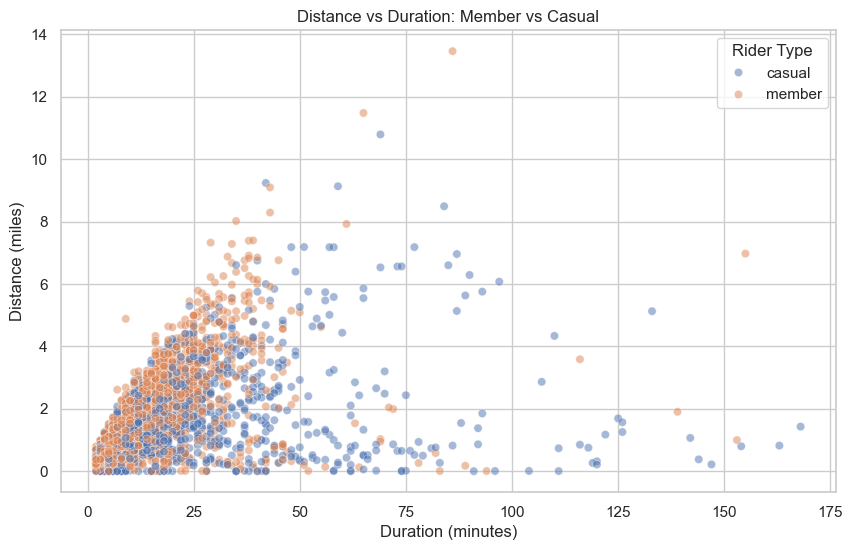

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(5000), x='duration_min', y='distance_miles', hue='member_casual', alpha=0.5)
plt.title("Distance vs Duration: Member vs Casual")
plt.xlabel("Duration (minutes)")
plt.ylabel("Distance (miles)")
plt.legend(title="Rider Type")
plt.grid(True)
plt.show()

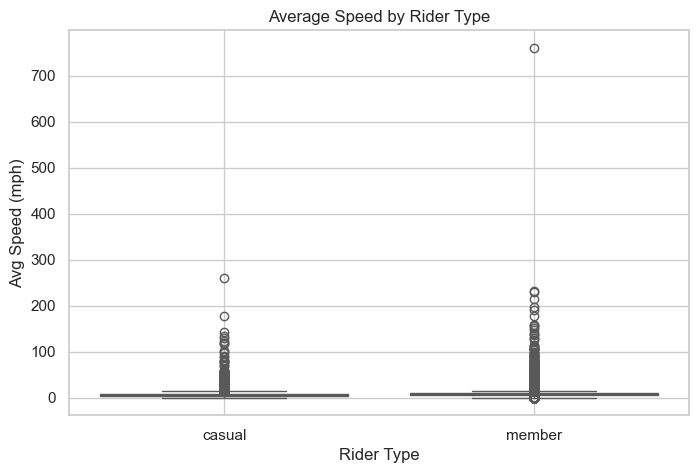

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='member_casual', y='avg_speed_mph', palette='Set2')
plt.title("Average Speed by Rider Type")
plt.ylabel("Avg Speed (mph)")
plt.xlabel("Rider Type")
plt.grid(True)
plt.show()


In [20]:
speed_stats = df.groupby('member_casual')['avg_speed_mph'].agg(['mean', 'median', 'std', 'count'])
print("\n📊 Average Speed Stats:\n", speed_stats)


📊 Average Speed Stats:
                    mean    median       std    count
member_casual                                       
casual         6.555986  6.470306  3.555493  1875345
member         8.034174  7.834515  3.234498  3422475


# Weekend Warriors vs Weekday Riders: How Does Ride Behavior Shift Between Weekdays and Weekends?

In [22]:
df = df.dropna(subset=['weekday_name', 'member_casual', 'duration_min', 'distance_miles'])

In [23]:
df['is_weekend'] = df['weekday_name'].isin(['Saturday', 'Sunday'])

In [24]:
grouped = df.groupby(['is_weekend', 'member_casual']).agg({
    'ride_id': 'count',
    'duration_min': 'mean',
    'distance_miles': 'mean'
}).reset_index()
grouped['is_weekend'] = grouped['is_weekend'].map({True: 'Weekend', False: 'Weekday'})
grouped.rename(columns={'ride_id': 'total_rides', 'duration_min': 'avg_duration', 'distance_miles': 'avg_distance'}, inplace=True)

print("📊 Weekend vs Weekday Rider Stats:\n")
print(grouped)

📊 Weekend vs Weekday Rider Stats:

  is_weekend member_casual  total_rides  avg_duration  avg_distance
0    Weekday        casual      1201531     16.553832      1.382424
1    Weekday        member      2601098     11.095063      1.365753
2    Weekend        casual       673814     20.803058      1.496440
3    Weekend        member       821377     12.778450      1.437406


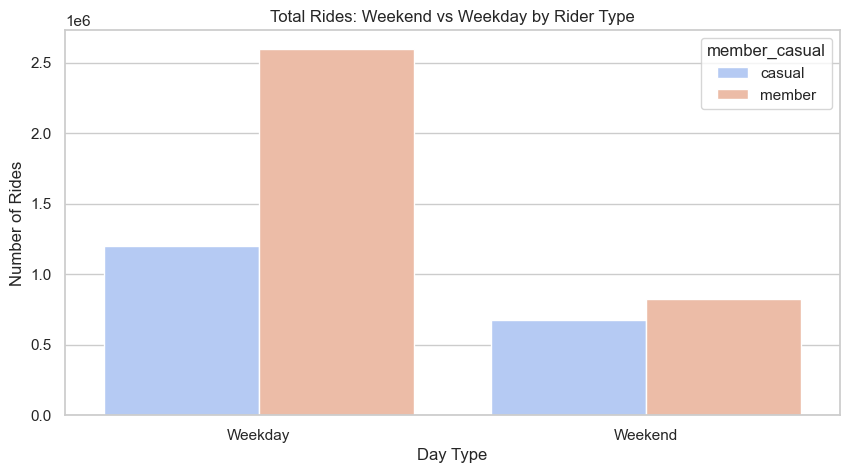

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(data=grouped, x='is_weekend', y='total_rides', hue='member_casual', palette='coolwarm')
plt.title("Total Rides: Weekend vs Weekday by Rider Type")
plt.ylabel("Number of Rides")
plt.xlabel("Day Type")
plt.show()

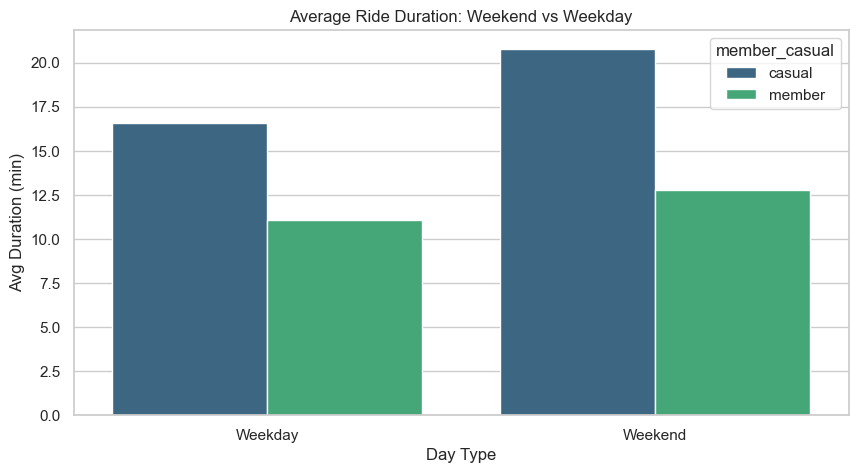

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(data=grouped, x='is_weekend', y='avg_duration', hue='member_casual', palette='viridis')
plt.title("Average Ride Duration: Weekend vs Weekday")
plt.ylabel("Avg Duration (min)")
plt.xlabel("Day Type")
plt.show()


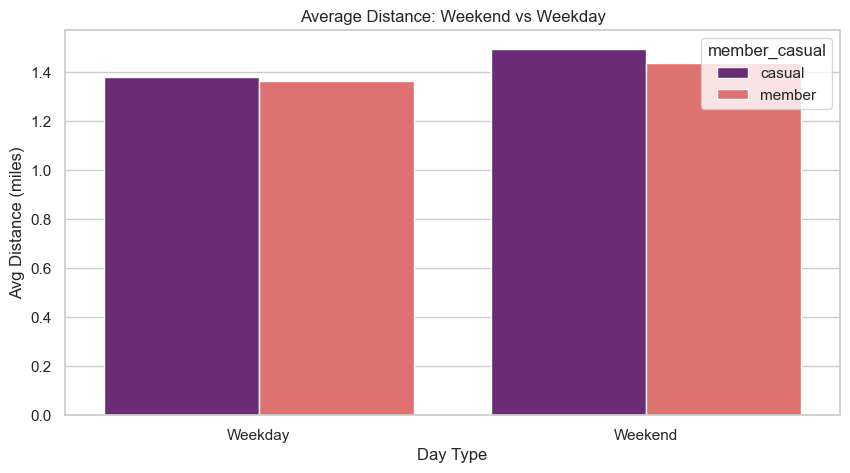

In [27]:
plt.figure(figsize=(10, 5))
sns.barplot(data=grouped, x='is_weekend', y='avg_distance', hue='member_casual', palette='magma')
plt.title("Average Distance: Weekend vs Weekday")
plt.ylabel("Avg Distance (miles)")
plt.xlabel("Day Type")
plt.show()

# Binary Classification Model to predict Weekday (0) vs Weekend (1) based on trip characteristics.

In [31]:
df['is_weekend'] = df['weekday_name'].isin(['Saturday', 'Sunday']).astype(int)

In [32]:
df_sample = df.sample(n=10000, random_state=42)

In [33]:
features = df_sample[['duration_min', 'distance_miles', 'hour']]
target = df_sample['is_weekend']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [35]:
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [36]:
y_pred = model.predict(X_test)
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))

📊 Confusion Matrix:
 [[1771  404]
 [ 597  228]]

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78      2175
           1       0.36      0.28      0.31       825

    accuracy                           0.67      3000
   macro avg       0.55      0.55      0.55      3000
weighted avg       0.64      0.67      0.65      3000



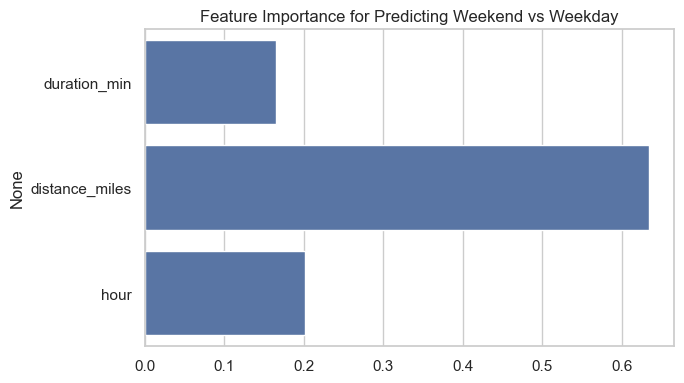

In [37]:
importances = model.feature_importances_
feature_names = features.columns
plt.figure(figsize=(7, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance for Predicting Weekend vs Weekday")
plt.tight_layout()
plt.show()